<a href="https://colab.research.google.com/github/eduardodut/Mineracao_dados_textos_web/blob/master/projeto01_equipe01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b> EQUIPE: </b>
  - Eduardo Façanha
  - Giovanni Brígido
  - Maurício Brito

<b> ATIVIDADE 01 </b> - Pré-processamento dos textos (Prazo: 11/05/2020 - 30%)

- Tokenização
- Lematização
- POS Tagging
- Normalização (hashtags, menções, emojis e símbolos especiais)
- Chunking
- NER (entidades nomeadas)
- Remoção stop-words

<b> ATIVIDADE 02 </b> - Representação Semântica (Prazo: 30/06/2020 - 30%)

- Uso de bases de conhecimento externas
- Identificação de tópicos
- Representação vetorial das palavras e textos

<b> ATIVIDADE 03 </b> - Analise da Linguagem Ofensiva - Subtarefas A e B (Prazo: 30/07/2020 - 40%)

- Resultado da subtarefa A para um conjunto de teste a ser fornecido
- Resultado da subtarefa B para um conjunto de teste a ser fornecido


## Atividade 03

### Bibliotecas utilizadas

Tecnologias utilizadas
figura do scikit learn
spacy
nltk


In [118]:
import spacy
import pandas as pd
import re
!pip install Transformers
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_md
!python -m spacy download en_core_web_lg
import en_core_web_lg
import en_core_web_md
import en_core_web_sm
nlp = spacy.load("en_core_web_sm")
!python -m nltk.downloader wordnet
!python -m nltk.downloader omw
!pip install spacy-wordnet
!pip install empath
from empath import Empath 

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')
/usr/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Package omw is already up-to-date!


#### Carregamento do arquivo de dados e transformação em DataFrame

É realizado o download do arquivo e instanciado um DataFrame com os dados. A variável do DataFrame é chamada 'tweets'

#### Dataset_treino

In [22]:
#download o arquivo localizado no reposítório do projeto
!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/olid-training-v1.0.tsv

#leitura para objeto dataframe
tweets = pd.read_csv('/content/olid-training-v1.0.tsv', sep='\t',encoding= 'utf-8', index_col = 'id')

#verificação e remoção de duplicatas

if tweets.duplicated(['tweet']).sum()>0:
  tweets.drop_duplicates(subset='tweet', keep='first', inplace=True)

print('TWEETS DUPLICADOS: ',tweets.duplicated(['tweet']).sum())


#visualização dos primeiros registros
tweets.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1915k  100 1915k    0     0  4102k      0 --:--:-- --:--:-- --:--:-- 4111k
TWEETS DUPLICADOS:  0


,tweet,subtask_a,subtask_b,subtask_c
id,,,,
86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN


In [121]:
#verificação e remoção de duplicatas

if tweets.duplicated(['tweet']).sum()>0:
  tweets.drop_duplicates(subset='tweet', keep='first', inplace=True)

print('TWEETS DUPLICADOS: ',tweets.duplicated(['tweet']).sum())

TWEETS DUPLICADOS:  0


#### testset_a

In [145]:
#download o arquivo localizado no reposítório do projeto
!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/testset-levela.tsv

#leitura para objeto dataframe
testset_a = pd.read_csv('/content/testset-levela.tsv', sep='\t',encoding= 'utf-8', index_col = 'id')

#conversão da coluna 'id' de inteiro para string
# testset_a['id'] = testset_a['id'].astype('str')
#verificação e remoção de duplicatas
# print(testset_a.duplicated(['tweet']).sum())
# if testset_a.duplicated(['tweet']).sum()>0:
#   testset_a.drop_duplicates(subset='tweet', keep='first', inplace=True)

# print('TWEETS DUPLICADOS: ',testset_a.duplicated(['tweet']).sum())
# testset_a = testset_a[['subtask_c','subtask_b','subtask_a','id','tweet']]
testset_a.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  130k  100  130k    0     0   655k      0 --:--:-- --:--:-- --:--:--  655k


,tweet
id,
15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...
27014,"#ConstitutionDay is revered by Conservatives, ..."
30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...
13876,#Watching #Boomer getting the news that she is...
60133,#NoPasaran: Unity demo to oppose the far-right...


#### testset_b

In [146]:
#download o arquivo localizado no reposítório do projeto
!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/testset-levelb.tsv

#leitura para objeto dataframe
testset_b = pd.read_csv('/content/testset-levelb.tsv', sep='\t',encoding= 'utf-8', index_col = 'id')
# print(testset_b.duplicated(['tweet']).sum())
# if testset_b.duplicated(['tweet']).sum()>0:
#   testset_b.drop_duplicates(subset='tweet', keep='first', inplace=True)

# print('TWEETS DUPLICADOS: ',testset_b.duplicated(['tweet']).sum())
testset_b.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35447  100 35447    0     0   103k      0 --:--:-- --:--:-- --:--:--  104k


,tweet
id,
15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...
60133,#NoPasaran: Unity demo to oppose the far-right...
83681,. . . What the fuck did he do this time?
65507,@USER Do you get the feeling he is kissing @US...
12588,@USER Nigga ware da hits at


### Funções auxiliares

#### Funções de preprocessamento e Limpeza


In [124]:
#Tratamento básico
def tratamento_texto(text):
  text = text.lower()
  text = text.strip()
  #remove as menções a usuários de cada text
  #remove as palavras url
  text = re.sub('url$', '', text, flags=re.MULTILINE)
  text = re.sub(r'^n$', 'and', text, flags=re.MULTILINE)
  text = re.sub(r'^u$', 'you', text, flags=re.MULTILINE)
  text = re.sub(r'^r$', 'are', text, flags=re.MULTILINE)
  text = re.sub(r'^sh*t$', 'shit', text, flags=re.MULTILINE)
  text = re.sub(r'&amp;', '', text, flags=re.MULTILINE)
  
  doc = nlp(text)
  tokens = []
  for token in doc:
      if token.lemma_ != "-PRON-" :
        if not token.is_stop:
          if not token.is_punct :
            tokens.append(token.lemma_)
  
  text =  " ".join([token for token in tokens]).strip()  

  
  return text

In [128]:
tratamento_texto(tweets.tweet.iloc[0])

'@user ask native americans'

#### Funções para criação de features

##### Features intrínsicas

##### Comprimento do tweet % (contagem de caracteres/comprimento máximo de um tweet)

In [24]:
def get_tweet_length(text):
    return len(text)/240.0
tweets.tweet.apply(get_tweet_length).head()

id
86426    0.295833
90194    0.279167
16820    0.758333
62688    0.270833
43605    0.300000
Name: tweet, dtype: float64

###### Histogramas


In [ ]:
tweets['comprimento_tweet'] = tweets.tweet.apply(get_tweet_length)
tweets.hist(column = 'comprimento_tweet', by= "subtask_a")
tweets.hist(column = 'comprimento_tweet', by= "subtask_b")

##### Contagem de palavras

In [130]:
def get_word_count(text):
  return len(text.split())

tweets.tweet.apply(get_word_count).head()

id
86426    14
90194    11
16820    27
62688    11
43605    12
Name: tweet, dtype: int64

###### Histogramas


In [ ]:
tweets['contagem_palavras'] = tweets.tweet.apply(get_word_count)
tweets.hist(column = 'contagem_palavras', by= "subtask_a")
tweets.hist(column = 'contagem_palavras', by= "subtask_b")

##### Comprimento médio das palavras

In [131]:
def get_avg_word_len(text):
  words = text.split()
  word_len = 0
  for word in words:
    word_len = word_len + len(word)
  return word_len/len(words)

tweets.tweet.apply(get_avg_word_len).head()

id
86426    4.142857
90194    5.181818
16820    5.777778
62688    5.000000
43605    5.083333
Name: tweet, dtype: float64

###### Histogramas


In [ ]:
tweets['avg_len'] = tweets.tweet.apply(get_avg_word_len)
tweets.hist(column = 'avg_len', by= "subtask_a")
tweets.hist(column = 'avg_len', by= "subtask_b")

##### Contagem de stop words

In [132]:
def get_stop_words_percent(text):
  return len([t for t in text.split() if t in STOP_WORDS])/len(text.split())


tweets.tweet.apply(get_stop_words_percent).head()

id
86426    0.571429
90194    0.000000
16820    0.296296
62688    0.363636
43605    0.250000
Name: tweet, dtype: float64

###### Histogramas


In [ ]:
tweets['sw_count'] = tweets.tweet.apply(get_stop_words_percent)
tweets.hist(column = 'sw_count', by= "subtask_a")
tweets.hist(column = 'sw_count', by= "subtask_b")

##### Percentual de #hashtags

In [133]:
def get_hashtag_percent(text):
  return len([t for t in text.split() if t.startswith("#")])/len(text.split())

tweets.tweet.apply(get_hashtag_percent).head()

id
86426    0.000000
90194    0.181818
16820    0.185185
62688    0.000000
43605    0.000000
Name: tweet, dtype: float64

###### Histogramas

In [ ]:
tweets['hashtag_count'] = tweets.tweet.apply(get_hashtag_percent)
tweets[tweets['hashtag_count'] > 0].hist(column = 'hashtag_count', by= "subtask_a")
tweets[tweets['hashtag_count'] > 0].hist(column = 'hashtag_count', by= "subtask_b")

##### Contagem de @menções

In [134]:
def get_mention_percent(text):
  return len([t for t in text.split() if t.startswith("@")])/len(text.split())

tweets.tweet.apply(get_mention_percent).head()

id
86426    0.071429
90194    0.272727
16820    0.000000
62688    0.090909
43605    0.166667
Name: tweet, dtype: float64

###### Histogramas


In [ ]:
tweets['mention_count'] = tweets.tweet.apply(get_mention_percent)
tweets[tweets['mention_count'] > 0].hist(column = 'mention_count', by= "subtask_a")
tweets[tweets['mention_count'] > 0].hist(column = 'mention_count', by= "subtask_b")

##### Contagem de palavras em MAIÚSCULO

In [135]:
def get_uppercase_percent(text):
  return len([t for t in text.split() if t.isupper()])/len(text.split())

tweets.tweet.apply(get_uppercase_percent).head()

id
86426    0.071429
90194    0.454545
16820    0.185185
62688    0.090909
43605    0.166667
Name: tweet, dtype: float64

###### Histogramas


In [ ]:
tweets['upper_count'] = tweets.tweet.apply(get_uppercase_percent)
tweets.hist(column = 'upper_count', by= "subtask_a")
tweets.hist(column = 'upper_count', by= "subtask_b")

##### Verificar se o tweet contém URL

In [136]:
def get_contain_url(text):

  return int('URL' in text )

tweets.tweet.apply(get_contain_url).head()

id
86426    0
90194    1
16820    1
62688    0
43605    0
Name: tweet, dtype: int64

##### Contagem de sentenças

In [137]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
def sent_count(text):
  return len(sent_tokenize(text))
tweets.tweet.apply(sent_count).head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


id
86426    1
90194    2
16820    2
62688    2
43605    1
Name: tweet, dtype: int64

###### Histogramas

In [ ]:
tweets['sent_count'] = tweets.tweet.apply(sent_count)
tweets.hist(column = 'sent_count', by= "subtask_a")
tweets.hist(column = 'sent_count', by= "subtask_b")

##### Lista de tipos de entidades

In [138]:
def extract_entities(text):
  doc = nlp(text)
  lista_entities = ""
  if len(doc.ents) > 0:
    for token in doc:
      if len(token.ent_type_) > 0:
        lista_entities = lista_entities  + " " + token.ent_type_
  
  return lista_entities




##### Features de bases de conhecimento externas

###### Classificar como positivo ou negativo

In [139]:
def classificar_positivo_negativo(text):

    doc = nlp(text)

    return doc.cats


###### Anexar embeddings

In [140]:
def get_embeddings(text):
  
  doc = nlp(text)
  return doc.vector


###### Empath

In [141]:
from empath import Empath
lexicon = Empath()



###### Criação das features

In [142]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, StandardScaler
from sklearn.pipeline import Pipeline

class Criar_Features(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        

        return self
    def transform(self, X):

        features = pd.DataFrame(X)
        #Comprimento do tweet/240.0
        features['length'] = features['tweet'].apply(get_tweet_length)
        #Hashtag por tweet (%)
        features['hashtag_%'] = features['tweet'].apply(get_hashtag_percent)
        #Menções por tweet (%)
        features['mentions_%'] = features['tweet'].apply(get_mention_percent)
        #Stop words (%)
        features['stop_words_%'] = features['tweet'].apply(get_stop_words_percent)
        #upper case (%)
        features['uppercase_%'] =  features['tweet'].apply(get_uppercase_percent)
        #contagem de sentenças
        features['sent_count'] = features['tweet'].apply(sent_count)
        #contém url
        features['has_url'] = features['tweet'].apply(get_contain_url)
        
        features['tweet'] = features['tweet'].apply(tratamento_texto)
               

        return features

# criar_features = Criar_Features()
# print(criar_features.fit_transform(tweets.tweet))

In [147]:
#@title Aumento das features de treino e teste { display-mode: "form" }

criar_trainset = True #@param {type:"boolean"}
criar_testset_a = True #@param {type:"boolean"}
criar_testset_b = True #@param {type:"boolean"}

if criar_trainset:
  trainset_aumentado = Criar_Features().fit_transform(tweets)
  trainset_aumentado.to_csv('/content/trainset_aumentado.txt', sep=' ')

if criar_testset_a:
  testset_a_aumentado = Criar_Features().fit_transform(testset_a)
  testset_a_aumentado.to_csv('/content/testset_a_aumentado.txt', sep=' ')


if criar_testset_b:
  testset_b_aumentado = Criar_Features().fit_transform(testset_b) 
  testset_b_aumentado.to_csv('/content/testset_b_aumentado.txt', sep=' ')



In [181]:
#@title Busca dos vetores de entidades, positivo e negativo, e vetores GloVe { display-mode: "form" }
criar_trainset = True #@param {type:"boolean"}
criar_testset_a = True #@param {type:"boolean"}
criar_testset_b = True #@param {type:"boolean"}


vetores_trainset = pd.DataFrame()
vetores_testset_a = pd.DataFrame()
vetores_testset_b = pd.DataFrame()
def buscar_vetores(dataset_aumentado):
  
  #Extrai entidades
  entidades = dataset_aumentado['tweet'].apply(extract_entities)
  
  
  
  #classifica como positivo ou negativo
  pos_neg = dataset_aumentado['tweet'].apply(classificar_positivo_negativo).apply(pd.Series)
  #busca vetores glove          
  vetor_glove = dataset_aumentado['tweet'].apply(get_embeddings).apply(pd.Series)
  df = pd.concat([entidades, pos_neg, vetor_glove],axis = 1)
      
  return df

for tamanho in ["pequeno", "medio", "grande"]:
  
  if tamanho == "grande":
    nlp = en_core_web_lg.load()

  if tamanho == "medio":
    nlp = en_core_web_md.load()

  if tamanho == "pequeno":
    nlp = en_core_web_sm.load()

  textcat = nlp.create_pipe("textcat")
  textcat.add_label("POSITIVE")
  textcat.add_label("NEGATIVE")
  
  nlp.add_pipe(textcat, last=True)
  
  nlp.begin_training()

  if criar_trainset:
    vetores_trainset = buscar_vetores(trainset_aumentado)
    vetores_trainset['entities'] = vetores_trainset['tweet']
    vetores_trainset.drop("tweet", inplace= True, axis=1)

    vetores_trainset.to_csv('/content/vetores_trainset_aumentado_'+ tamanho + '.txt', sep=' ')

  if criar_testset_a:
    vetores_testset_a = buscar_vetores(testset_a_aumentado)
    vetores_testset_a['entities'] = vetores_testset_a['tweet']
    vetores_testset_a.drop("tweet", inplace= True, axis=1)
    vetores_testset_a.to_csv('/content/vetores_testset_a_aumentado_'+ tamanho + '.txt', sep=' ')


  if criar_testset_b:
    vetores_testset_b = buscar_vetores(testset_b_aumentado)
    vetores_testset_b['entities'] = vetores_testset_b['tweet']
    vetores_testset_b.drop("tweet", inplace= True, axis=1)
    vetores_testset_b.to_csv('/content/vetores_testset_b_aumentado_'+ tamanho + '.txt', sep=' ')

  nlp.remove_pipe('textcat')

### Pipelines


In [1]:
#@title Download dos datasets e vetores pré-configurados

!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/datasets_aumentados/trainset_aumentado.txt



!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/datasets_aumentados/testset_a_aumentado.txt




!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/datasets_aumentados/testset_b_aumentado.txt





!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/datasets_aumentados/vetores_trainset_aumentado_grande.txt




!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/datasets_aumentados/vetores_trainset_aumentado_medio.txt




!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/datasets_aumentados/vetores_trainset_aumentado_pequeno.txt






!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/datasets_aumentados/vetores_testset_a_aumentado_grande.txt



!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/datasets_aumentados/vetores_testset_a_aumentado_medio.txt



!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/datasets_aumentados/vetores_testset_a_aumentado_pequeno.txt


!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/datasets_aumentados/vetores_testset_b_aumentado_grande.txt




!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/datasets_aumentados/vetores_testset_b_aumentado_medio.txt



!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/datasets_aumentados/vetores_testset_b_aumentado_pequeno.txt






  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1814k  100 1814k    0     0  4986k      0 --:--:-- --:--:-- --:--:-- 4986k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  143k  100  143k    0     0   751k      0 --:--:-- --:--:-- --:--:--  751k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 39213  100 39213    0     0   181k      0 --:--:-- --:--:-- --:--:--  181k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 44.1M  100 44.1M    0     0  35.2M      0  0:00:01  0:00:01 --:--:-- 35.2M
  % Total    % Received % Xferd  Average Speed   Tim

In [2]:
#@title Leitura dos datasets aumentados e respectivos vetores { display-mode: "form" }
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

#pasta raiz dos arquivos
pasta_raiz = '/content'

trainset_aumentado = pd.read_csv(pasta_raiz+'/trainset_aumentado.txt', sep=' ', index_col='id')

testset_a_aumentado = pd.read_csv(pasta_raiz+'/testset_a_aumentado.txt', sep=' ', index_col='id')

testset_b_aumentado = pd.read_csv(pasta_raiz+'/testset_b_aumentado.txt', sep=' ', index_col='id')




vetores_trainset_aumentado_grande = pd.read_csv('/content/vetores_trainset_aumentado_grande.txt', sep=' ', index_col = 'id')
vetores_trainset_aumentado_grande.entities.fillna("",inplace=True)

vetores_trainset_aumentado_medio = pd.read_csv('/content/vetores_trainset_aumentado_medio.txt', sep=' ', index_col = 'id')
vetores_trainset_aumentado_medio.entities.fillna("",inplace=True)

vetores_trainset_aumentado_pequeno = pd.read_csv('/content/vetores_trainset_aumentado_pequeno.txt', sep=' ', index_col = 'id')
vetores_trainset_aumentado_pequeno.entities.fillna("",inplace=True)

vetores_testset_a_aumentado_grande = pd.read_csv('vetores_testset_a_aumentado_grande.txt', sep=' ', index_col = 'id')
vetores_testset_a_aumentado_grande.entities.fillna("",inplace=True)

vetores_testset_a_aumentado_medio = pd.read_csv('vetores_testset_a_aumentado_medio.txt', sep=' ', index_col = 'id')
vetores_testset_a_aumentado_medio.entities.fillna("",inplace=True)

vetores_testset_a_aumentado_pequeno = pd.read_csv('vetores_testset_a_aumentado_pequeno.txt', sep=' ', index_col = 'id')
vetores_testset_a_aumentado_pequeno.entities.fillna("",inplace=True)

vetores_testset_b_aumentado_grande = pd.read_csv('vetores_testset_b_aumentado_grande.txt', sep=' ', index_col = 'id')
vetores_testset_b_aumentado_grande.entities.fillna("",inplace=True)

vetores_testset_b_aumentado_medio = pd.read_csv('vetores_testset_b_aumentado_medio.txt', sep=' ', index_col = 'id')
vetores_testset_b_aumentado_medio.entities.fillna("",inplace=True)

vetores_testset_b_aumentado_pequeno = pd.read_csv('vetores_testset_b_aumentado_pequeno.txt', sep=' ', index_col = 'id')
vetores_testset_b_aumentado_pequeno.entities.fillna("",inplace=True)

dict_vetores = {'pequeno':[vetores_trainset_aumentado_pequeno, vetores_testset_a_aumentado_pequeno, vetores_testset_b_aumentado_pequeno],
                'medio':[vetores_trainset_aumentado_medio, vetores_testset_a_aumentado_medio, vetores_testset_b_aumentado_medio],
                'grande':[vetores_trainset_aumentado_grande, vetores_testset_a_aumentado_grande, vetores_testset_b_aumentado_grande]
}

VOCABULARIO_TWEETS = TfidfVectorizer().fit(pd.concat([testset_a_aumentado['tweet'], 
                                                      testset_b_aumentado['tweet'], 
                                                      trainset_aumentado['tweet']])).vocabulary_
VOCABULARIO_ENTIDADES = TfidfVectorizer().fit(pd.concat([vetores_testset_a_aumentado_grande['entities'], 
                                                         vetores_testset_b_aumentado_grande['entities'], 
                                                         vetores_trainset_aumentado_grande['entities']])).vocabulary_

#### Funções auxiliares

In [3]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names= []):
        self.attribute_names = attribute_names
        
        
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        if len(self.attribute_names) == 1:
          print("nome do atributo: ", self.attribute_names)
          print(X.head())          
          return X.loc[:,self.attribute_names[0]]
        return X[self.attribute_names]


In [4]:
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

class Vetorizador_tfidf(BaseEstimator, TransformerMixin):
    def __init__(self,               
                 use_idf = False, ngram_range = (1,1), 
                 tokenizer = TweetTokenizer().tokenize):
      
        self.use_idf
        self.tfidf_vectorizer = TfidfVectorizer(use_idf = use_idf, ngram_range=ngram_range, tokenizer=tokenizer)
    
        
    def fit(self, X, y=None):

        return self.tfidf_vectorizer.fit(pd.concat([testset_a_aumentado['tweet'], testset_b_aumentado['tweet'], trainset_aumentado['tweet']]))
    def transform(self, X):
        
        return self.tfidf_vectorizer.transform(X)


In [5]:
class Anexar_Vetores(BaseEstimator, TransformerMixin):
    def __init__(self, tamanho = ""):
        self.tamanho = tamanho
        
        
    def fit(self, X, y=None):
        return self
    def transform(self, X):
      
      for vetor in dict_vetores[self.tamanho]:

        

        if X.index.isin(vetor.index).all():
          return X.join(vetor.loc[X.index.values])
  


In [6]:
from sklearn.preprocessing import FunctionTransformer
def pipelinizar(function, active=True):
    def list_comprehend_a_function(list_or_series, active=True):
        if active:
            return [function(i) for i in list_or_series]
        else: # if it's not active, just pass it right back
            return list_or_series
    return FunctionTransformer(list_comprehend_a_function, validate=False, kw_args={'active':active})

#### Pipeline vetorização do texto

In [7]:
from sklearn.pipeline import Pipeline
from nltk.tokenize import TweetTokenizer
vetorizar_tweets = ColumnTransformer(
        [('vetorizar' ,  TfidfVectorizer(vocabulary=VOCABULARIO_TWEETS),"tweet")])


vetorizar_tweets.fit_transform(trainset_aumentado.join(dict_vetores['grande'][0])).toarray().shape

(13207, 16678)

#### Pipeline vetor de entidades

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.compose import ColumnTransformer


anexar_entidades = ColumnTransformer(
        [('vetorizar' ,  TfidfVectorizer(vocabulary=VOCABULARIO_ENTIDADES),"entities")])

anexar_entidades.fit_transform(trainset_aumentado.join(dict_vetores['grande'][0])).toarray().shape

(13207, 18)

#### Pipeline features numéricas

In [9]:
class Selecionar_Features_Numericas(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names= []):
        self.attribute_names = attribute_names
        
        
    def fit(self, X, y=None):
        return self
    def transform(self, X):

        return X[X.dtypes[X.dtypes == 'float64'].index].values

features_numericas = Pipeline(steps= [('features_numericas', Selecionar_Features_Numericas())])
# features_numericas.fit_transform(X_train)        

### União das features


In [10]:
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer



uniao_features = FeatureUnion([("vetores_entidades", ColumnTransformer([
                                                                        ('vetorizar',
                                                                         TfidfVectorizer(vocabulary= VOCABULARIO_ENTIDADES),
                                                                         "entities")])), #vetorizar a coluna entidades
                               ("features_numericas", Selecionar_Features_Numericas()),   #concatenar todas as features numéricas sem alteração
                               ("vetorizar_tweets", ColumnTransformer([
                                                                       ('vetorizar' ,  
                                                                        TfidfVectorizer(vocabulary= VOCABULARIO_TWEETS, tokenizer= TweetTokenizer().tokenize),
                                                                        "tweet")]))])   #vetorizar os tweets


### Subtask A

##### Histograma dos targets

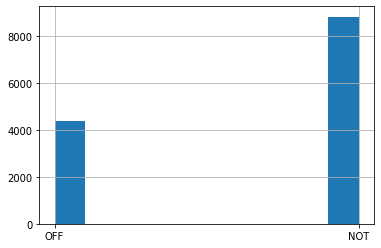

In [12]:
trainset_aumentado.subtask_a.fillna("NaN").hist()
# tweets.subtask_a.hist()

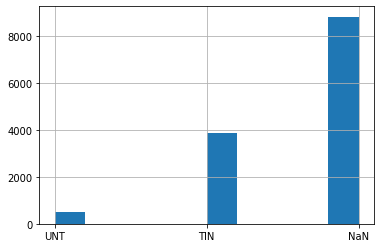

In [13]:
trainset_aumentado.subtask_b.fillna("NaN").hist()

#### Segregação de dados de treino e de teste

In [71]:
#@title Seleção de parâmetros da separação de dados de teste e treino
test_size = 0.2 #@param {type:"slider", min:0, max:1, step:0.01}
target = "subtask_b" #@param ["subtask_a", "subtask_b"]
estratificar_alvo = True #@param {type:"boolean"}
remover_nan = True #@param {type:"boolean"}


from sklearn.model_selection import train_test_split

X = trainset_aumentado
if remover_nan:
  y = trainset_aumentado[target].dropna()
  X = trainset_aumentado[trainset_aumentado[target] == trainset_aumentado[target]]
else:
  y = trainset_aumentado[target].fillna("NOT")


stratify = None 
if estratificar_alvo == True:
  stratify = y

X_train, X_test, y_train, y_test = train_test_split(X.drop(X.loc[:,X.columns.str.startswith('subtask')], axis=1), y, test_size=test_size, random_state= 42, stratify= stratify)

print("Quantidade de orbservações de teste: ", y_test.count())
print("Percentual por categoria")
print(y_test.value_counts()*100/y_test.count())
print('-------------')
print("Quantidade de orbservações de treino: ", y_train.count())
print("Percentual por categoria")
print(y_train.value_counts()*100/y_train.count())


Quantidade de orbservações de teste:  879
Percentual por categoria
TIN    88.054608
UNT    11.945392
Name: subtask_b, dtype: float64
-------------
Quantidade de orbservações de treino:  3513
Percentual por categoria
TIN    88.101338
UNT    11.898662
Name: subtask_b, dtype: float64


In [12]:
param_grid_anexar_vetores = {'anexar_vetores__tamanho': ['pequeno', 'medio', 'grande']}

param_grid_feature_union = {'uniao_features__vetorizar_tweets__vetorizar__ngram_range': [(1,1),(2,2),(1,2)],
                            'uniao_features__vetorizar_tweets__vetorizar__use_idf': [True,False],
                            'uniao_features__vetores_entidades__vetorizar__use_idf' : [True,False]                          
                            }

param_grid_reduc_dim = {}


# xgb.XGBClassifier
# param_grid_rand_for = {'classifier__n_estimators' : np.arange(60,600,10), 
#                      'classifier__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [52]:
RandomForestClassifier(n_estimators=[10,30,1000]).

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       n_estimators=[10, 30, 1000], n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [73]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB

# dict_algoritmos = {'logistic_regression': LogisticRegression(),
#                    'random_forest' : RandomForestClassifier(),
#                    'svm': ,
#                    'naive_bayes' : ,
#                    'ada_boost': ,
#                    'extra_trees': ,
#                    'knn': , 
#                    'xgboost': xgb.,
#                    'extra_trees' : 
#                    }

In [ ]:
#@title Treinamento
num_cv = 3 #@param {type:"integer"}
algoritmo = "logistic_regression" #@param ["logistic_regression", "random_forest", "svm", "naive_bayes", "ada_boost", "knn", "xgboost", "extra_trees"]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.decomposition import TruncatedSVD

classifier = xgb.XGBClassifier(n_jobs= -1)
param_grid_algoritmo = {}

param_grid = {**param_grid_anexar_vetores, 
              **param_grid_feature_union, 
              **param_grid_reduc_dim, 
              **param_grid_algoritmo}

# classifier.fit(features, y_train)
classificador = Pipeline([("anexar_vetores", Anexar_Vetores()),
                          ('uniao_features', uniao_features),
                          # ('reducao_dimensionalidade', TruncatedSVD(n_components = 10000)), PCA
                          ('classifier',classifier)
    ])


gridsearchcv = GridSearchCV(classificador, param_grid, cv= 5, scoring='f1_weighted', n_jobs= -1,verbose= 10)
gridsearchcv.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 13

In [61]:
gridsearchcv.cv_results_ 

{'mean_fit_time': array([19.08187881, 19.15802116, 14.10071087, 14.10986867, 19.33555369,
        19.40805321, 20.26961889, 19.33995414, 14.02592287, 14.05102425,
        19.29879088, 19.15421562, 20.49251266, 20.40827279, 16.70202713,
        16.77006884, 20.38153324, 20.5152523 , 20.85512176, 20.83251057,
        16.65829701, 16.74979086, 20.58227515, 20.40543151, 20.30255904,
        20.22435145, 16.66097946, 16.65547729, 20.45203829, 20.23058534,
        20.92165728, 20.89556479, 16.55530543, 16.43878946, 20.26512799,
        19.91777444]),
 'mean_score_time': array([0.40689406, 0.42711048, 0.4538209 , 0.42818785, 0.43517394,
        0.45862193, 0.44558492, 0.45349646, 0.42578731, 0.41555767,
        0.45988293, 0.54993567, 0.60236435, 0.56246505, 0.52924461,
        0.57009015, 0.6145226 , 0.61640835, 0.55731316, 0.53884397,
        0.54460969, 0.56521158, 0.62782531, 0.58430123, 0.51107039,
        0.63865538, 0.53000069, 0.5739377 , 0.60000453, 0.63626823,
        0.60286522, 0.

In [62]:
gridsearchcv.best_params_

{'anexar_vetores__tamanho': 'medio',
 'uniao_features__vetores_entidades__vetorizar__use_idf': False,
 'uniao_features__vetorizar_tweets__vetorizar__ngram_range': (1, 1),
 'uniao_features__vetorizar_tweets__vetorizar__use_idf': True}

In [63]:
y_pred = gridsearchcv.predict(X_test)
print("F1 Score")
print(f1_score(y_test, y_pred, average='weighted'))

F1 Score
0.6851896167237592


In [64]:
pd.Series(y_pred).value_counts()

NOT    2332
OFF     310
dtype: int64

In [65]:
t = gridsearchcv.predict(testset_a_aumentado)
pd.Series(t).value_counts()

NOT    775
OFF     85
dtype: int64

##### Baseline


In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

import nltk
tokenizer = nltk.casual.TweetTokenizer(preserve_case=False, reduce_len=True) 

count_vect = CountVectorizer(tokenizer=tokenizer.tokenize) 
classifier = RandomForestClassifier()

pipeline = Pipeline([
                    
        ('uniao_features', uniao_features),
        ('classifier', classifier)
    ])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("F1 Score")
print(f1_score(y_test, y_pred, average='macro'))


ValueError: ignored

#### Algoritmos utilizados

#### Ajuste de hiperparâmetros

In [ ]:
y_pred

In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import re
from sklearn.metrics import f1_score

def genericize_mentions(text):
    return re.sub(r'@[\w_-]+', 'thisisanatmention', text)

def get_tweet_length(text):
    return len(text)

def pipelinize(function, active=True):
    def list_comprehend_a_function(list_or_series, active=True):
        if active:
            return [function(i) for i in list_or_series]
        else: # if it's not active, just pass it right back
            return list_or_series
    return FunctionTransformer(list_comprehend_a_function, validate=False, kw_args={'active':active})

def reshape_a_feature_column(series):
    return np.reshape(np.asarray(series), (len(series), 1))

def pipelinize_feature(function, active=True):
    def list_comprehend_a_function(list_or_series, active=True):
        if active:
            processed = [function(i) for i in list_or_series]
            processed = reshape_a_feature_column(processed)
            return processed
#         This is incredibly stupid and hacky, but we need it to do a grid search.
#         If a feature is deactivated, we're going to just return a column of zeroes.
#         Zeroes shouldn't affect the regression, but other values may.
#         If you really want brownie points, consider pulling out that feature column later in the pipeline.
        else:
            return reshape_a_feature_column(np.zeros(len(list_or_series)))

    return FunctionTransformer(list_comprehend_a_function, validate=False, kw_args={'active':active})

def display_null_accuracy(y_test):
    value_counts = pd.value_counts(y_test)
    null_accuracy = max(value_counts) / float(len(y_test))
    print( 'null accuracy: %s' % '{:.2%}'.format(null_accuracy))
    return null_accuracy

def display_accuracy_score(y_test, y_pred_class):
    score = accuracy_score(y_test, y_pred_class)
    print ('accuracy score: %s' % '{:.2%}'.format(score))
    return score

def display_accuracy_difference(y_test, y_pred_class):
    null_accuracy = display_null_accuracy(y_test)
    accuracy_score = display_accuracy_score(y_test, y_pred_class)
    difference = accuracy_score - null_accuracy
    if difference > 0:
        print('model is %s more accurate than null accuracy' % '{:.2%}'.format(difference))
    elif difference < 0:
        print( 'model is %s less accurate than null accuracy' % '{:.2%}'.format(abs(difference)))
    elif difference == 0:
        print( 'model is exactly as accurate as null accuracy')
    return null_accuracy, accuracy_score

def train_test_and_evaluate(pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    y_pred_class = pipeline.predict(X_test)
    display_accuracy_difference(y_test, y_pred_class)

    print("F1 Score")
    print(f1_score(y_test, y_pred_class, average='macro'))
      
    return pipeline


In [ ]:
def spacy_tokenizer_lemmatizer(text):
    
    nlp = English()
    tokenizer = nlp.Defaults.create_tokenizer(nlp)
    tokens = tokenizer(text)
    
    lemma_list = []
    for token in tokens:
        if (token.is_stop and token.is_punct) is False :
            lemma_list.append(token.lemma_)
    
    return(lemma_list)

print(tweets.tweet[0])
spacy_tokenizer_lemmatizer(tweets.tweet[0])

@USER She should ask a few native Americans what their take on this is.


['@USER', 'ask', 'native', 'Americans']

## rascunhos

In [ ]:
for sent in tweets['tokens_sem_stopwords'][0]:
  for palavra in sent:
    print(palavra)
    if len(wn.synsets(palavra))>0:
      print(wn.synsets(palavra)[0].hypernyms()[0].name())
    

def busca_hiperonimos(lista_sentencas_tokenizadas):
  dicionario_sinonimos = dict()
  dicionario_antonimos = dict()

  for sent in lista_sentencas_tokenizadas:
    for palavra in sent:
      sinonimos = []
      antonimos = []
      for syn  in wn.synsets(palavra):
        for l in syn.lemmas():
          if l.name() not in sinonimos:
            sinonimos.append(l.name()) 
          if l.antonyms():
              antonimos.append(l.antonyms()[0].name())
      if len(sinonimos) > 0:
        dicionario_sinonimos[palavra] = sinonimos
      if len(antonimos) > 0:
        dicionario_antonimos[palavra] = antonimos
    
  return dicionario_sinonimos, dicionario_antonimos



@user
ask
communicate.v.02
native
person.n.01
americans
inhabitant.n.01
take
income.n.01


In [ ]:
import unicodedata
from sklearn.base import BaseEstimator, TransformerMixin

class TextNormalizer(BaseEstimator, TransformerMixin):
  def __init__(self, language='english'):
    self.stopwords = set(nltk.corpus.stopwords.words(language))
    self.lemmatizer = WordNetLemmatizer()
  
  def is_punct(self, token):
    return all(
    unicodedata.category(char).startswith('P') for char in token)
  def is_stopword(self, token):
    return token.lower() in self.stopwords

  def normalize(self, document):

    return [
    self.lemmatize(token, tag).lower()
    for paragraph in document
    for sentence in paragraph
    for (token, tag) in sentence
    if not self.is_punct(token) and not self.is_stopword(token)
    ]


def lemmatize(self, token, pos_tag):
  tag = {
  'N': wn.NOUN,
  'V': wn.VERB,
  'R': wn.ADV,
  'J': wn.ADJ
  }.get(pos_tag[0], wn.NOUN)
  return self.lemmatizer.lemmatize(token, tag)

def fit(self, X, y=None):
  return self
def transform(self, documents):
  for document in documents:
    yield self.normalize(document)


In [ ]:
import unicodedata
from sklearn.base import BaseEstimator, TransformerMixin
class TextNormalizer(BaseEstimator, TransformerMixin):
  def __init__(self, language='english'):
    self.stopwords = set(nltk.corpus.stopwords.words(language))
    self.lemmatizer = WordNetLemmatizer()
  def is_punct(self, token):
    return all(unicodedata.category(char).startswith('P') for char in token)
 
  def is_stopword(self, token):
    return token.lower() in self.stopwords
 
  def normalize(self, document):
    return [
      self.lemmatize(token, tag).lower()
      for paragraph in document
        for sentence in paragraph
          for (token, tag) in sentence
            if not self.is_punct(token) and not self.is_stopword(token)
    ]
  
  def lemmatize(self, token, pos_tag):
    tag = {
    'N': wn.NOUN,
    'V': wn.VERB,
    'R': wn.ADV,
    'J': wn.ADJ
    }.get(pos_tag[0], wn.NOUN)
    return self.lemmatizer.lemmatize(token, tag)
  
  
  def fit(self, X, y=None):
    return self
  def transform(self, documents):
    for document in documents:
      yield self.normalize(document)

In [ ]:
from sklearn.preprocessing import FunctionTransformer
def pipelinize(function, active=True):
    def list_comprehend_a_function(list_or_series, active=True):
        if active:
            return [function(i) for i in list_or_series]
        else: # if it's not active, just pass it right back
            return list_or_series
    return FunctionTransformer(list_comprehend_a_function, validate=False, kw_args={'active':active})